# EDA

## Goal: 
Provide insight on the difference's between accounts that paid a balance vs. accounts that did not pay at all. 

### Data: 
- import our cleaned dataset `Data_cleaned.csv` 
    - comprises of the below dataset: 
        - `DB_Accounts_2012-2015.txt`
        - `DB_Entities.txt`
        - `DB_Entities_Additional.txt`
        - `DB_Purchases.txt`
        - `DB_Splits.txt`
        - `uszips.csv`
       


# Obtaining the Data 

In [7]:
import pandas as pd 
import sys
import pandas_profiling 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv('Data_version_2.csv')

In [21]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
data.columns

Index(['Account_ID', 'Entity_ID', 'Seller_Type', 'Creditor_Name',
       'Closure_Type', 'Entity_City', 'Entity_State', 'Entity_Zip',
       'Median_Household_Income', 'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'Invoice_bal', 'Age', 'Target', 'Income_level',
       'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age', 'Paid'],
      dtype='object')

In [31]:
data.Closure_Type.value_counts()

UNPAID       11913480
SETTLE         408778
UNCOL          174535
PIF            147758
SLBKPASS        26913
MINOR           17295
FAPWO           11554
LEGAL            8360
CEASE            2176
COMPLT            946
DUP               632
ERROR             449
BNK7              355
NEVERWORK         275
BNK13             141
DECEASED          115
RECALL             39
BNK                35
SMB                25
FRAUD              21
CPL                10
KEEP               10
BAN                 7
DISPUTE             3
INCAR               3
EXHAUSTED           1
ATTY                1
Name: Closure_Type, dtype: int64

# Age 
---

In [28]:
#creating a function to bin ages 
def age(row):
    if row >= 18 and row <= 21:
        return ('18-21')
    elif row >= 22 and row <= 24:
        return ('22-24')
    elif row >= 25 and row <= 29:
        return ('25-29')   
    elif row >= 30 and row <= 34:
        return ('30-34')
    elif row >= 35 and row <= 39:
        return ('35-39')
    elif row >= 40 and row <= 44:
        return ('40-44')
    elif row >= 45 and row <= 49:
        return ('45-49')
    elif row >= 50 and row <= 54:
        return ('50-54')
    elif row >= 55 and row <= 59:
        return ('55-59')
    elif row >= 60 and row <= 64:
        return ('60-64')
    elif row >= 65 and row <= 69:
        return ('65-69')
    elif row >= 70 and row <= 74:
        return ('70-74')
    elif row >= 75 and row <= 79:
        return ('75-79')
    elif row >= 80 and row <= 84:
        return ('80-84')
    elif row >= 85 and row <= 89:
        return ('85-89')
    else: 
        return ('90 +')

Since there is a variety of ages, we will bin the ages into 16 categories 
- `18-21` 
- `22-24` 
- `25-29` 
- `30-34`
- `35-39`
- `40-44`
- `45-49`
- `50-54`
- `55-59`
- `60-64`
- `65-69`
- `70-74`
- `75-79`
- `80-84`
- `85-89`
- `90 and above`

In [29]:
#creating age range column 
data['Age_range'] = data.Age.apply(age)

In [43]:
#creating paid and unpaid dataset
paid = data[(data.Closure_Type == 'SETTLE') | (data.Closure_Type == 'PIF')]
unpaid = data[(data.Closure_Type != 'SETTLE') & (data.Closure_Type != 'PIF')]

## Questions - Of the accounts that paid, 
1. What is the average invoice balance? 
2. What is the average paid amount? 
3. What is the median house hold income?


## Age specific questions:
1. Which age range paid the most dollar amount? What is the avg.invoice balance? 
2. Which age range paid the most in terms of percentage, within the category? 


In [91]:
paid_groupby_age = paid.groupby(by=['Age_range'])
unpaid_groupby_age = unpaid.groupby(by=['Age_range'])
total_groupby_age = data.groupby(by=['Age_range'])

In [52]:
paid_mean = paid_groupby_age.mean()
paid_count = paid_groupby_age.count()
unpaid_mean = unpaid_groupby_age.mean()
unpaid_count = unpaid_groupby_age.count()

In [61]:
#sort values by age range 
paid_df = paid.sort_values(by='Age_range')
unpaid_df = unpaid.sort_values(by='Age_range')

In [83]:
#Creating a list with age range labels and values for paid, unpaid and total 
age_range = paid_df.Age_range.unique()

paid_age_range_values =[]
unpaid_age_range_values = []
total_age_range_values = []

for i in age_range: 
    y = len(paid_df[paid_df.Age_range == i])
    paid_age_range_values.append(y)
    
for i in age_range: 
    y = len(unpaid_df[unpaid_df.Age_range == i])
    unpaid_age_range_values.append(y)    
    
for i in age_range: 
    y = len(data[data.Age_range == i])
    total_age_range_values.append(y)


In [63]:
print('Paid: ',len(paid_df))
print('Total:',len(data))
print('Percentage:', (round((len(paid_df) / len(data))*100 ,2)),'%')

Paid:  556536
Total: 12713917
Percentage: 4.38 %


## Quantity of Accounts by Age Range 

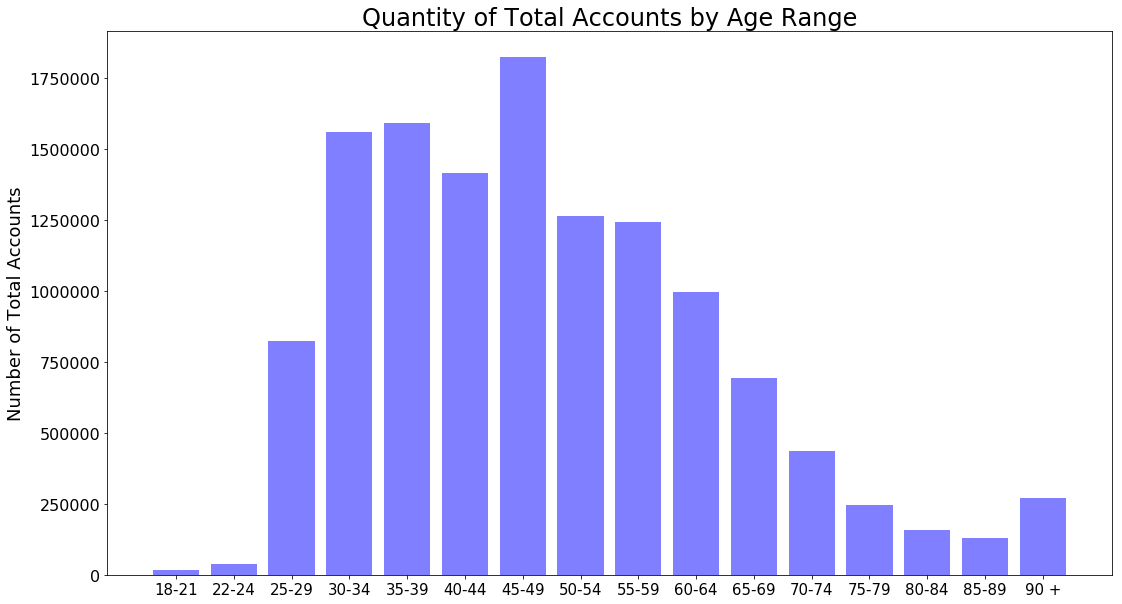

In [78]:
# Create the plot bars
# In x position
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        total_age_range_values, 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='blue',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Number of Total Accounts', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Quantity of Total Accounts by Age Range', fontsize=24)

plt.show()

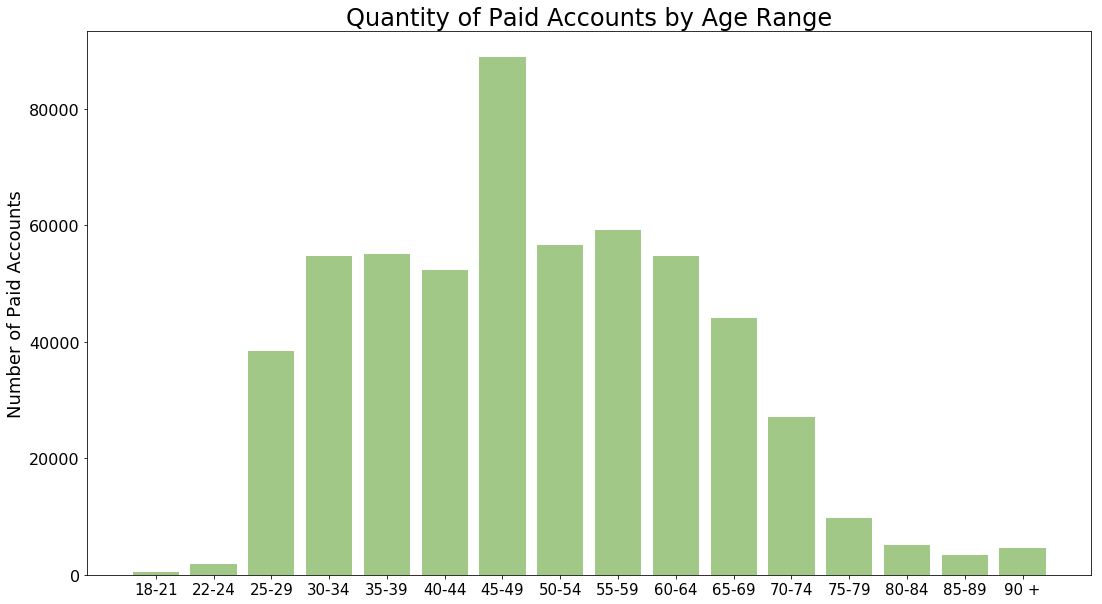

In [76]:
# Create the plot bars
# In x position
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        paid_age_range_values, 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#469212ff',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Number of Paid Accounts', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Quantity of Paid Accounts by Age Range', fontsize=24)

plt.show()


[503,
 1782,
 38414,
 54709,
 55056,
 52371,
 88890,
 56672,
 59141,
 54789,
 44156,
 27085,
 9760,
 5111,
 3479,
 4618]

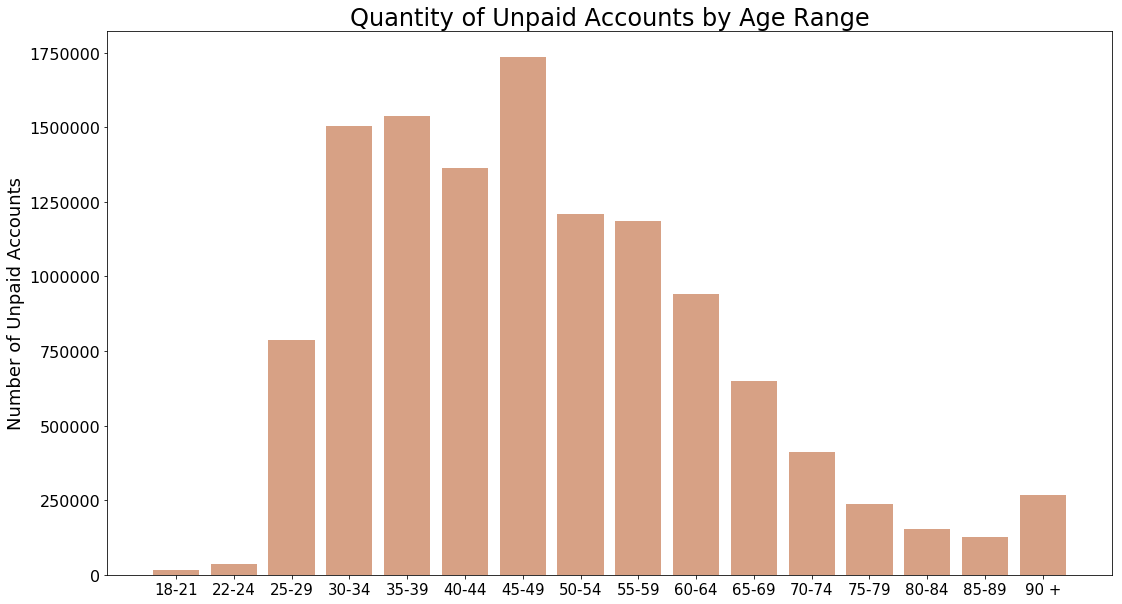

In [77]:
# Create the plot bars
# In x position
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        unpaid_age_range_values, 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#b0450cff',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Number of Unpaid Accounts', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Quantity of Unpaid Accounts by Age Range', fontsize=24)

plt.show()

In [85]:
a = np.array(paid_age_range_values)
b = np.array(total_age_range_values)
percent_paid = a / b

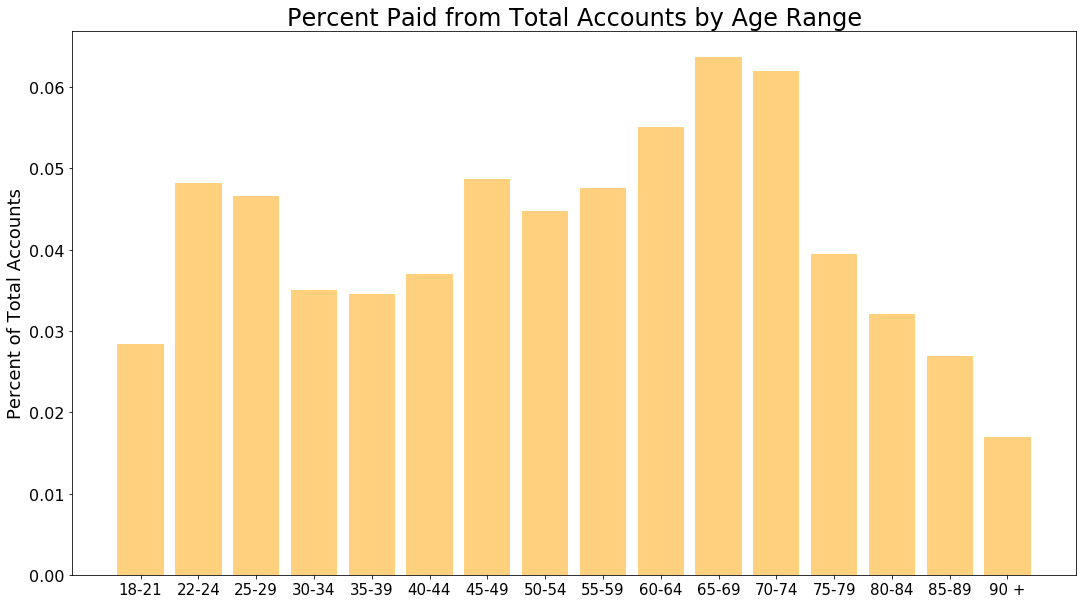

In [90]:
# Create the plot bars
# In x position
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        percent_paid, 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='orange',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Percent of Total Accounts', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Percent Paid from Total Accounts by Age Range', fontsize=24)

plt.show()

### What is the average balance of total accounts? 

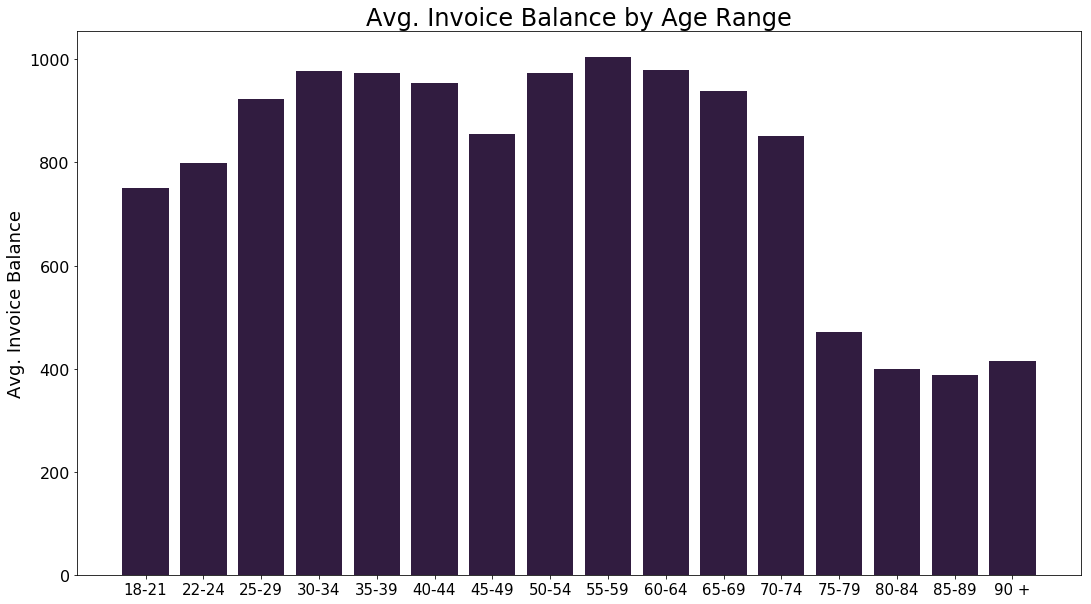

In [99]:
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        total_groupby_age.Invoice_bal.mean(), 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#311C40',
        # alpha 0.5
        alpha=1)

# set axes labels and title
plt.ylabel('Avg. Invoice Balance', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Avg. Invoice Balance by Age Range', fontsize=24)

plt.show()

### What is the average balance of paid accounts? 

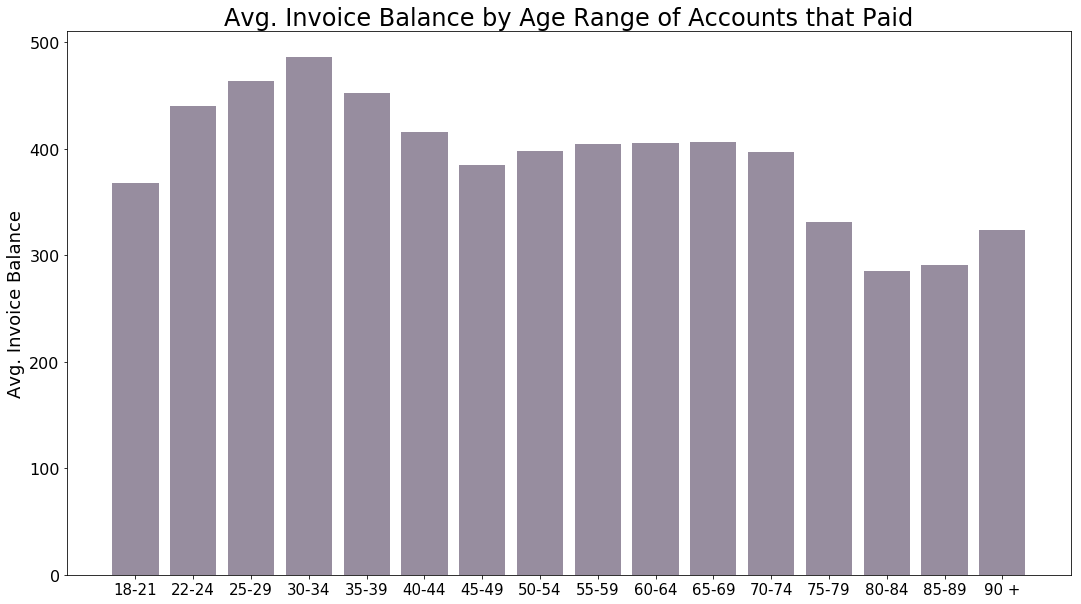

In [96]:
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        paid_groupby_age.Invoice_bal.mean(), 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#311C40',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Avg. Invoice Balance', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Avg. Invoice Balance by Age Range of Accounts that Paid', fontsize=24)

plt.show()

In [159]:
paid_groupby_age.Invoice_bal.mean()

Age_range
18-21    367.808926
22-24    440.061448
25-29    463.822052
30-34    486.165538
35-39    452.474194
40-44    415.647792
45-49    385.149534
50-54    398.281497
55-59    404.093570
60-64    405.222629
65-69    406.459812
70-74    397.205118
75-79    331.082734
80-84    285.568004
85-89    291.052578
90 +     324.208476
Name: Invoice_bal, dtype: float64

### What is the average collected within the age range? 


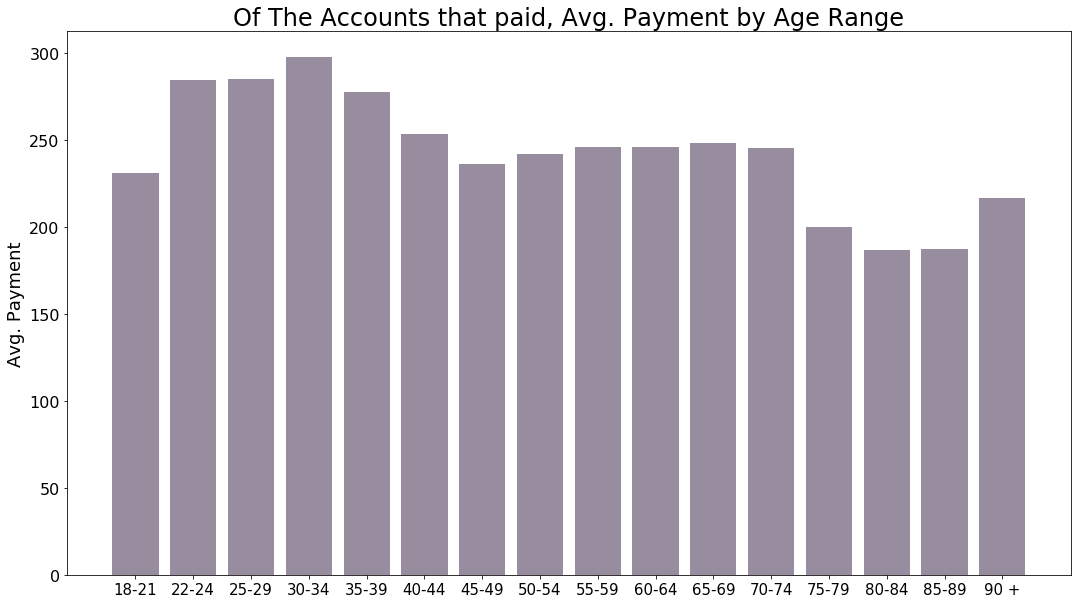

In [100]:
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        paid_groupby_age.Total_Paid.mean(), 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#311C40',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Avg. Payment', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Of The Accounts that paid, Avg. Payment by Age Range', fontsize=24)

plt.show()

In [161]:
paid_groupby_age.Total_Paid.mean()

Age_range
18-21    231.378592
22-24    284.926917
25-29    285.273071
30-34    297.899945
35-39    278.022464
40-44    253.671041
45-49    236.463813
50-54    242.258159
55-59    246.348483
60-64    246.388457
65-69    248.688304
70-74    245.662268
75-79    200.030902
80-84    186.740654
85-89    187.437382
90 +     216.861679
Name: Total_Paid, dtype: float64

### What is the total amount paid by age range? 

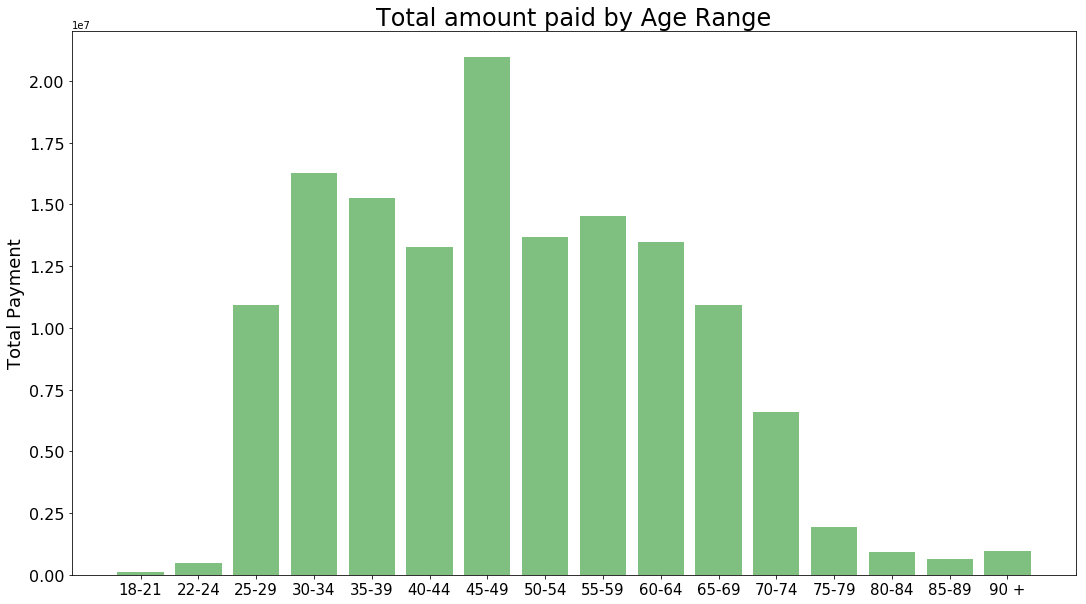

In [158]:
plt.figure(figsize=(18,10))
plt.bar(age_range,
        # using the data from the mean_values
        paid_groupby_age.Total_Paid.sum(), 
        # with a y-error lines set at variance
        #yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='green',
        # alpha 0.5
        alpha=0.5)

# set axes labels and title
plt.ylabel('Total Payment', fontsize=18)
plt.xticks(age_range, fontsize=15)
plt.yticks(fontsize=16)
plt.title('Total amount paid by Age Range', fontsize=24)

plt.show()

In [157]:
paid_groupby_age.Total_Paid.sum()

Age_range
18-21      113375.51
22-24      497197.47
25-29    10912265.51
30-34    16259676.92
35-39    15271217.92
40-44    13263951.41
45-49    20964881.70
50-54    13698972.14
55-59    14531357.95
60-64    13457491.15
65-69    10932586.53
70-74     6608560.66
75-79     1927897.83
80-84      936877.86
85-89      642160.47
90 +       976745.00
Name: Total_Paid, dtype: float64

#### Observations:
---

1. In terms of quantity of total accounts by age range, age `45-49` has the most number of accounts, and the has the most number of accounts that paid. 
    - Number of Accounts: 88,890
    - Avg. Invoice Balance of The Accounts that Paid: \\$385.14
    - Avg. collected: \\$236.46
    - Total collected: \\$20,964,881.70
    
    
2. In second place, in terms of number of accounts that paid by age range, is `55-59`. 
    - Number of Accounts: 59,141
    - Avg. Invoice Balance of The Accounts that Paid: \\$404.09
    - Avg. collected: \\$246.34
    - Total collected: \\$14,531,357.95
    
    
3. In third place, in terms of number of accounts that paid by age range, is `50-54`.
    - Number of Accounts: 59,141
    - Avg. Invoice Balance of The Accounts that Paid: \\$385.14
    - Avg. collected: \\$242.25
    - Total collected: \\$13,698,972.14
    
 
 
**Intersting Find:** 

4. Behind age range `45-49`, age `30-34` has the second most collected amount of \\$16,259,676.92. 
    - Number of Accounts: 54,709
    - Avg. Invoice Balance of The Accounts that Paid: \\$486.16
    - Avg. collected: \\$297.89
    - Total collected: \\$16,259,676.92.
---

In [163]:
paid.columns

Index(['Account_ID', 'Entity_ID', 'Seller_Type', 'Creditor_Name',
       'Closure_Type', 'Entity_City', 'Entity_State', 'Entity_Zip',
       'Median_Household_Income', 'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'Invoice_bal', 'Age', 'Target', 'Income_level',
       'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age', 'Paid', 'Age_range'],
      dtype='object')

#### Age 45-49
Let's look deeper into paid accounts within the age range `45-49` 

In [152]:
df_groupby = paid.groupby(['Age_range', 'Seller_Type', 'Income_level'])['Total_Paid'].size().reset_index()
df_total_groupby = data.groupby(['Age_range', 'Seller_Type', 'Income_level'])['Total_Paid'].size().reset_index()

In [153]:
paid_45_49 = df_groupby[df_groupby.Age_range == '45-49']
paid_45_49.rename(columns={'Total_Paid': 'Count'}, inplace=True)
paid_45_49

,Age_range,Seller_Type,Income_level,Count
85,45-49,AMBULANCE,0ver_150k,6
86,45-49,AMBULANCE,100k_to_150k,156
87,45-49,AMBULANCE,25k_to_35k,84
88,45-49,AMBULANCE,35k_to_50k,966
89,45-49,AMBULANCE,50k_to_75k,4004
90,45-49,AMBULANCE,75k_to_100k,1008
91,45-49,AMBULANCE,Under_20k,2
92,45-49,HOSPITAL,0ver_150k,47
93,45-49,HOSPITAL,100k_to_150k,1283
94,45-49,HOSPITAL,20k_to_25k,117


In [155]:
total_45_49 = df_total_groupby[df_total_groupby.Age_range == '45-49']
total_45_49.rename(columns={'Total_Paid': 'Count'}, inplace=True)
total_45_49

,Age_range,Seller_Type,Income_level,Count
96,45-49,AMBULANCE,0ver_150k,113
97,45-49,AMBULANCE,100k_to_150k,3991
98,45-49,AMBULANCE,20k_to_25k,402
99,45-49,AMBULANCE,25k_to_35k,4784
100,45-49,AMBULANCE,35k_to_50k,52005
101,45-49,AMBULANCE,50k_to_75k,165450
102,45-49,AMBULANCE,75k_to_100k,29959
103,45-49,AMBULANCE,Under_20k,184
104,45-49,HOSPITAL,0ver_150k,195
105,45-49,HOSPITAL,100k_to_150k,9429


In [144]:
a = paid.groupby(['Age_range', 'Seller_Type', 'Income_level','Target','Total_Paid'])

In [146]:
b = a.size().reset_index(name='Count')

In [149]:
b[(b.Age_range == '45-49') & (b.Seller_Type == 'AMBULANCE')]

,Age_range,Seller_Type,Income_level,Target,Total_Paid,Count
139715,45-49,AMBULANCE,0ver_150k,A,179.35,1
139716,45-49,AMBULANCE,0ver_150k,A,314.62,1
139717,45-49,AMBULANCE,0ver_150k,D,1300.00,1
139718,45-49,AMBULANCE,0ver_150k,E,415.39,1
139719,45-49,AMBULANCE,0ver_150k,E,511.77,1
139720,45-49,AMBULANCE,0ver_150k,E,1080.65,1
139721,45-49,AMBULANCE,100k_to_150k,A,32.90,1
139722,45-49,AMBULANCE,100k_to_150k,A,50.00,8
139723,45-49,AMBULANCE,100k_to_150k,A,68.40,1
139724,45-49,AMBULANCE,100k_to_150k,A,72.58,1


# Seller_Type 
--- 
Below is a comparison of `Seller_Type`

In [26]:
seller_type = dataSeller_Type

In [27]:
seller_type.head()

0    HOSPITAL
1    HOSPITAL
2    HOSPITAL
3    HOSPITAL
4    HOSPITAL
Name: Seller_Type, dtype: object